In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, binom, poisson, uniform, norm, expon
from tabulate import tabulate
from IPython.display import HTML, display
from collections import Counter
from collections import defaultdict
import math


"D:\src\BSUIR\6" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


ModuleNotFoundError: No module named 'pandas'

In [78]:
data_sets_files = ["set_1.csv", "set_2.csv", "set_3.csv"]
data_sets = [pd.read_csv(filename, header=None).values.flatten() for filename in data_sets_files]

1
66
{0: 29797, 1: 57892, 2: 9994, 3: 1696, 4: 283, 5: 44, 6: 219, 7: 63, 8: 7, 9: 3, 10: 1, 13: 1}


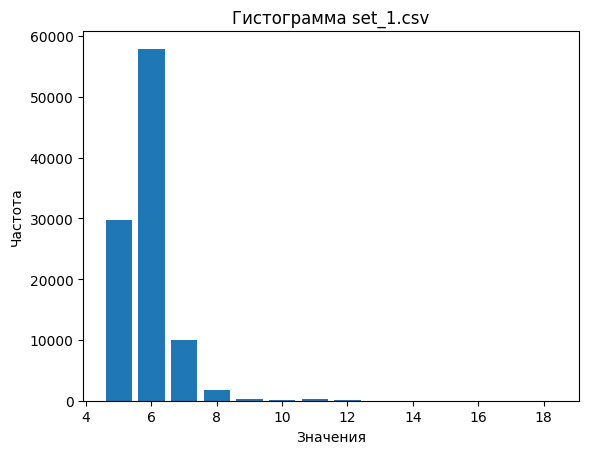

-1071.786686
698.777979
{0: 1, 1: 2, 2: 1, 3: 7, 4: 43, 5: 45, 6: 91, 7: 2433, 8: 5975, 9: 1317, 10: 77, 11: 5, 12: 3}


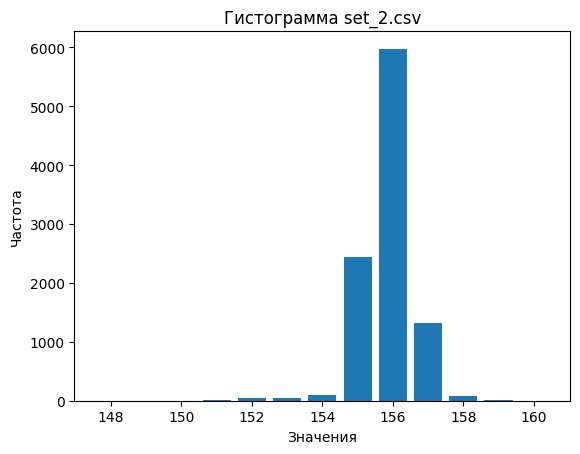

-1.989815
2.433138
{0: 1, 1: 35, 2: 8146, 3: 91341, 4: 474, 5: 3}


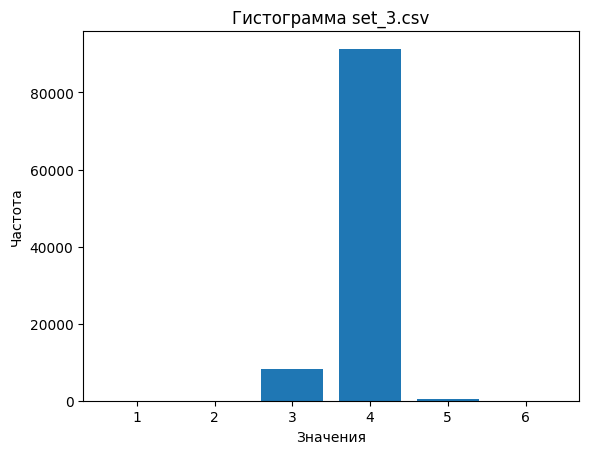

In [93]:
data_set = data_sets[0]

for data_set, set_name in zip(data_sets, data_sets_files):
    N = len(data_set)
    n = math.ceil(1 + 1.14 * math.log(N))
    
    min_val = min(data_set)
    max_val = max(data_set)
    print(min_val)
    print(max_val)
    step = math.ceil((max_val - min_val) / n)
    intervals = defaultdict(int)
    for data in data_set:
        index = math.ceil((data - min_val) / step)
        intervals[index] += 1
    intervals = {key:intervals[key] for key in sorted(intervals)}
    print(intervals)
    # plt.bar(intervals, bins=15)


    plt.bar([k + step for k in intervals.keys()], list(intervals.values()), align='center')
    # plt.xticks(range(len(D)), list(D.keys()))
    # counter = Counter(data_set).most_common()
    
    
    
    # most_common_values = [item[0] for item in counter[:15]]
    # print(most_common_values)
    # new_set = []
    # i = 0
    # for k, v in counter:
    #     if i == 15:
    #         break
    #     new_set.extend([k] * v)
    #     i += 1

    # plt.hist(new_set, bins=15, edgecolor='black', linewidth=1.2)

    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {set_name}')
    
    plt.show()

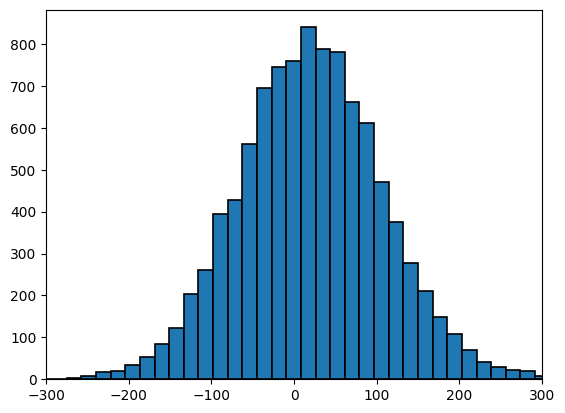

In [36]:
bins = 100
width = 0.8
data_set = data_sets[1]
plt.hist(data_set, bins=bins, edgecolor='black', linewidth=1.2)
    
min_val = -300
max_val = 300
plt.xlim(min_val, max_val)
    
bin_width = (max_val - min_val) / bins
    
positions = [min_val + bin_width * i for i in range(bins)]
    
for pos in positions:
    rect = plt.Rectangle((pos - width / 2, 0), width, 0, alpha=0.7)
    plt.gca().add_patch(rect)
    
plt.show()

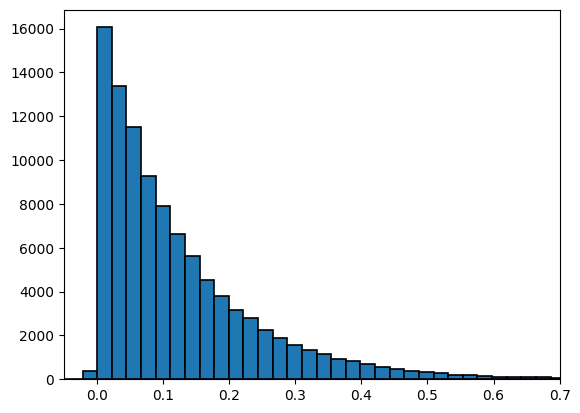

In [32]:
bins = 200
width = 0.8
data_set = data_sets[2]
plt.hist(data_set, bins=bins, edgecolor='black', linewidth=1.2)
    
min_val = -0.05
max_val = 0.7
plt.xlim(min_val, max_val)
    
bin_width = (max_val - min_val) / bins
    
positions = [min_val + bin_width * i for i in range(bins)]
    
for pos in positions:
    rect = plt.Rectangle((pos - width / 2, 0), width, 0, alpha=0.7)
    plt.gca().add_patch(rect)
    
plt.show()

In [ ]:


plt.hist(data_set_3, bins=10, density=True, alpha=0.5)

plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма данных из set_3.csv')

plt.show()

In [ ]:
def mean(values):
    if not values:
        return None
    return sum(values) / len(values)

def variance(data, mean):
    n = len(data)
    if n < 2:
        raise ValueError("The data should contain at least two elements.")
    
    squared_diffs = [(x - mean) ** 2 for x in data]
    return np.sum(squared_diffs) / (n - 1)

mean_arr = [mean(data_set.tolist()) for data_set in data_sets]
variance_arr = [variance(data_set.tolist(), mean_set) for data_set, mean_set in zip(data_sets, mean_arr)]

data = {
    'Headers': data_sets_files,
    'Mean': mean_arr,
    'Variance': variance_arr
}
table = f"""<table>
<tr>
<th></th>
{[f"<th>{header}</th>" for header in data_sets_files]}
</tr>
<tr>
<td>Mean</td>
{[f"<td>{mean}</td>" for mean in data["Mean"]]}
</tr>
<tr>
<td>Variance</td>
{[f"<td>{variance}</td>" for variance in data["Variance"]]}
</tr>
</table>"""

display(HTML(table))